In [1]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
import matplotlib.pyplot as plt
import numpy as np

#  Define the image dimensions and batch size

In [2]:
img_height, img_width = 224, 224
batch_size = 32

# Define the directories containing your training, validation, and test data

In [ ]:
train_data_dir = r"D:\Flower_dataset\Processed_data\train"
valid_data_dir = r"D:\Flower_dataset\Processed_data\val"
test_data_dir = r"D:\Flower_dataset\Processed_data\test"

# Create generator for train, val, test


In [3]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

valid_generator = train_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 1554 images belonging to 5 classes.
Found 342 images belonging to 5 classes.


In [4]:
test_generator = train_datagen.flow_from_directory(
    test_data_dir,  # Same directory as training data
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)


Found 346 images belonging to 5 classes.


In [5]:
# 860 pic are in val folder 
validation_datagen = ImageDataGenerator(rescale=1./255)  # You may need to adjust this based on your preprocessing requirements

validation_generator = train_datagen.flow_from_directory(
        valid_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')

Found 860 images belonging to 5 classes.


# Show shape

In [6]:
x, y = test_generator.next()
x.shape

(1, 224, 224, 3)

# Show class_indices , class_name

In [7]:
# Accessing class indices
class_indices = train_generator.class_indices
print("Class indices:", class_indices)

# Accessing class names
class_names = list(train_generator.class_indices.keys())
print("Class names:", class_names)


Class indices: {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}
Class names: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [8]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming you have created train_generator with your augmented data
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator
)

Epoch 1/10
49/49 [==============================] - 123s 2s/step - loss: 0.7533 - accuracy: 0.7767 - val_loss: 0.5639 - val_accuracy: 0.7953
Epoch 2/10
49/49 [==============================] - 124s 3s/step - loss: 0.2538 - accuracy: 0.9176 - val_loss: 0.4509 - val_accuracy: 0.8538
Epoch 3/10
49/49 [==============================] - 121s 2s/step - loss: 0.1470 - accuracy: 0.9511 - val_loss: 0.5137 - val_accuracy: 0.8421
Epoch 4/10
49/49 [==============================] - 120s 2s/step - loss: 0.1338 - accuracy: 0.9459 - val_loss: 0.7049 - val_accuracy: 0.8070
Epoch 5/10
49/49 [==============================] - 124s 3s/step - loss: 0.1123 - accuracy: 0.9633 - val_loss: 0.5834 - val_accuracy: 0.8275
Epoch 6/10
49/49 [==============================] - 119s 2s/step - loss: 0.0941 - accuracy: 0.9698 - val_loss: 0.3955 - val_accuracy: 0.8830
Epoch 7/10
49/49 [==============================] - 114s 2s/step - loss: 0.0541 - accuracy: 0.9826 - val_loss: 0.4688 - val_accuracy: 0.8743
Epoch 8/10
49

# Show fig

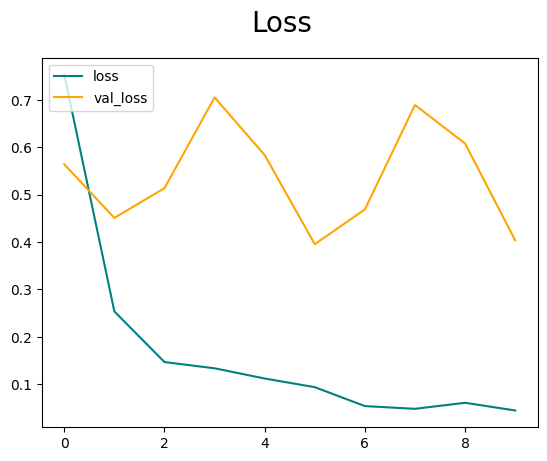

In [9]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

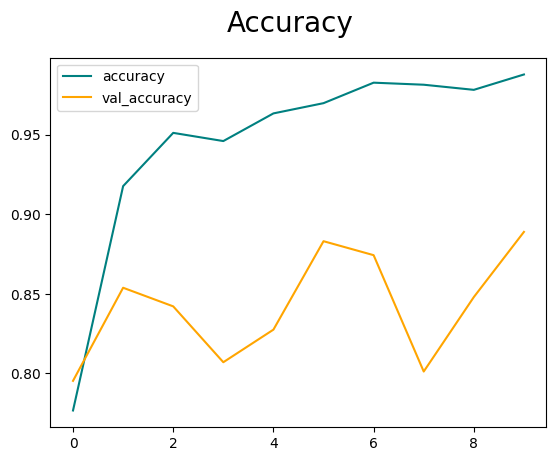

In [10]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Show: precision, recall, f1-score, support

# Save model

In [14]:
import pickle

# Define the full path to the folder where you want to save the file
folder_path = r'C:\Users\sangw\Project ADY\History of models\\'

# Save the history object using pickle
file_path = folder_path + 'ResNet50_history.pkl'
with open(file_path, 'wb') as pkl_file:
    pickle.dump(history.history, pkl_file)

In [18]:
import os
from tensorflow.keras.models import save_model
model.save(os.path.join('models','ResNet50.h5'))

# Load model

In [19]:
import pickle
from tensorflow.keras.models import load_model

# Define the path to the saved history file
file_path = r'C:\Users\sangw\Project ADY\History of models\ResNet50_history.pkl'

# Load the history object from the file
with open(file_path, 'rb') as pkl_file:
    loaded_history = pickle.load(pkl_file)

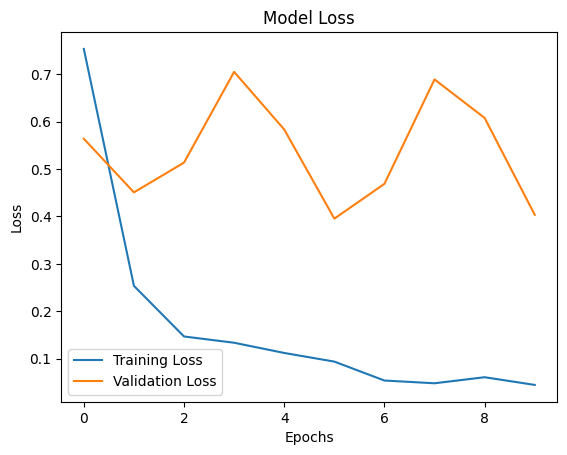

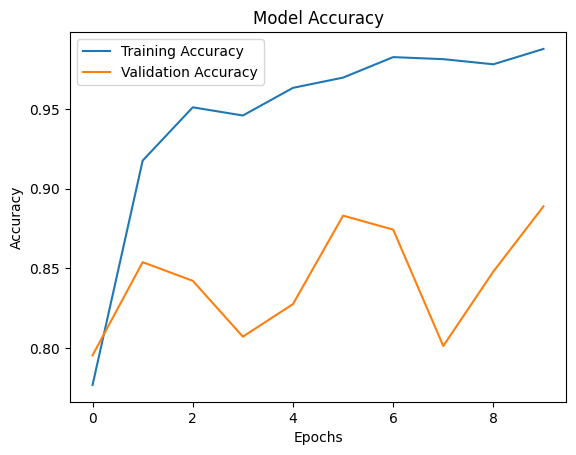

In [20]:
import pickle
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Define the path to the saved history file
file_path = r'C:\Users\sangw\Project ADY\History of models\ResNet50_history.pkl'

# Load the history object from the file
with open(file_path, 'rb') as pkl_file:
    loaded_history = pickle.load(pkl_file)

# Plot training and validation loss
plt.plot(loaded_history['loss'], label='Training Loss')
plt.plot(loaded_history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(loaded_history['accuracy'], label='Training Accuracy')
plt.plot(loaded_history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



# Evaluated

1/1 [==============================] - 0s 96ms/step


1/1 [==============================] - 0s 104ms/step


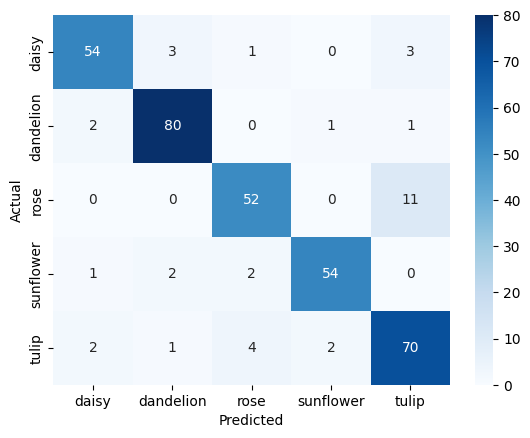

Test accuracy: 89.60%
              precision    recall  f1-score   support

       daisy       0.92      0.89      0.90        61
   dandelion       0.93      0.95      0.94        84
        rose       0.88      0.83      0.85        63
   sunflower       0.95      0.92      0.93        59
       tulip       0.82      0.89      0.85        79

    accuracy                           0.90       346
   macro avg       0.90      0.89      0.90       346
weighted avg       0.90      0.90      0.90       346



In [23]:


from sklearn.metrics import classification_report

# Assuming test_generator is already defined and filenames is defined
# Assuming train_generator.class_indices is defined

nb_samples = len(test_generator)
y_prob = []
y_act = []
test_generator.reset()

for _ in range(nb_samples):
    X_test, Y_test = test_generator.next() 
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[np.argmax(i)] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[np.argmax(i)] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,
                      columns=['predicted_class','actual_class'])

confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

# Calculate precision, recall, and F1-score
report = classification_report(out_df['actual_class'], out_df['predicted_class'], output_dict=True)

sn.heatmap(confusion_matrix, cmap='Blues', annot=True, fmt='d')
plt.show()

test_accuracy = np.diag(confusion_matrix).sum() / confusion_matrix.values.sum() * 100
print('Test accuracy: {:.2f}%'.format(test_accuracy))

# Print classification report
print(classification_report(out_df['actual_class'], out_df['predicted_class']))
